# KRX price-volume analysis

## Import libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pathlib import Path

cur_path = Path('.').resolve() / "pricevolume"
cur_path

WindowsPath('E:/VSCodeProjects/FinanceDashboard/pricevolume')

In [4]:
## Custom libs

from pricevolume.processor import Preprocessor, Lv2Converter
from pricevolume.utils import DateUtil

## Load data

lv1 data load

In [5]:
kosdaq_df = pd.read_pickle(cur_path / "cache" / "KSQ_20150101_to_20211031_lv1_df.pkl")
kospi_df = pd.read_pickle(cur_path / "cache" / "STK_20150101_to_20211031_lv1_df.pkl")

- ISU_SRT_CD: 종목코드
- ISU_ABBRV: 종목명
- MKT_NM: 시장구분
- SECT_TP_NM: 소속부
- TDD_CLSPRC: 종가
- FLUC_TP_CD: 방향 (1: 상승, 2: 하락)
- CMPPREVDD_PRC: 대비
- FLUC_RT: 등락률
- TDD_OPNPRC: 시가
- TDD_HGPRC: 고가
- TDD_LWPRC: 저가
- ACC_TRDVOL: 거래량
- ACC_TRDVAL: 거래대금
- MKTCAP: 시가총액
- LIST_SHRS: 상장주식수
- MKT_ID: 시장종류 
- trdDd: 날짜


## Preprocess

In [6]:
kospi_df = Preprocessor.comma_number_2_float(
    kospi_df, 
    columns=kospi_df.columns[4:15]
    )

In [7]:
kospi_df = Preprocessor.nullstr_2_nan(
    kospi_df,
    columns=kospi_df.columns[4:15],
    nullstr="-"
)

In [8]:
kospi_df = Preprocessor.columns_2_float(
    kospi_df,
    columns=kospi_df.columns[4:15],
)

In [9]:
kospi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244861 entries, 0 to 2244860
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ISU_SRT_CD     object 
 1   ISU_ABBRV      object 
 2   MKT_NM         object 
 3   SECT_TP_NM     object 
 4   TDD_CLSPRC     float64
 5   FLUC_TP_CD     float64
 6   CMPPREVDD_PRC  float64
 7   FLUC_RT        float64
 8   TDD_OPNPRC     float64
 9   TDD_HGPRC      float64
 10  TDD_LWPRC      float64
 11  ACC_TRDVOL     float64
 12  ACC_TRDVAL     float64
 13  MKTCAP         float64
 14  LIST_SHRS      float64
 15  MKT_ID         object 
 16  trdDd          int64  
dtypes: float64(11), int64(1), object(5)
memory usage: 291.2+ MB


## lv2 conversion

### method 1: dataframe pivot 

(selected method)

In [10]:
mktcap_lv2_df = kospi_df.pivot(index="trdDd", columns="ISU_SRT_CD", values="MKTCAP")
mktcap_lv2_df

ISU_SRT_CD,000020,000030,000040,000050,000060,000070,000075,000080,000087,000100,...,381970,383220,383800,38380K,395400,900050,900140,950010,950100,950210
trdDd,,,,,,,,,,,,,,,,,,,,,
20150101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20150102,1.544610e+11,6.620765e+12,1.247117e+11,5.140363e+11,1.335134e+12,7.690715e+11,1.245118e+10,1.585020e+12,2.034248e+10,1.884780e+12,...,NaN,NaN,NaN,NaN,NaN,4.123225e+11,9.071272e+11,3.314413e+09,4.273380e+11,NaN
20150103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20150104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20150105,1.536231e+11,6.512561e+12,1.259052e+11,5.085533e+11,1.313941e+12,7.596508e+11,1.229915e+10,1.616580e+12,1.989043e+10,1.873628e+12,...,NaN,NaN,NaN,NaN,NaN,3.877993e+11,8.999468e+11,3.314413e+09,4.273380e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211027,4.580761e+11,NaN,9.709874e+10,3.646231e+11,3.558438e+12,9.249413e+11,2.143609e+10,2.507277e+12,2.378940e+10,4.310334e+12,...,1.197355e+12,6.596478e+12,6.933915e+11,2.051399e+10,1.002983e+12,NaN,3.351644e+11,NaN,NaN,1.508413e+12
20211028,4.734384e+11,NaN,9.950218e+10,3.605108e+11,3.510188e+12,8.949663e+11,2.122325e+10,2.475716e+12,2.356338e+10,4.254356e+12,...,1.204568e+12,6.688415e+12,6.819494e+11,2.036746e+10,9.921314e+11,NaN,3.331752e+11,NaN,NaN,1.496394e+12
20211029,4.566795e+11,NaN,9.950218e+10,3.646231e+11,3.341312e+12,8.821199e+11,2.094960e+10,2.440650e+12,2.361988e+10,4.191380e+12,...,1.178120e+12,6.650108e+12,6.727957e+11,2.022093e+10,9.936816e+11,NaN,3.321807e+11,NaN,NaN,1.448317e+12


In [11]:
date_list = np.array(mktcap_lv2_df.index)
are_tradingdays = ~mktcap_lv2_df.isnull().all(axis=1) # TODO: Bad variable name
is_tradingdays = True 
date_list = date_list[are_tradingdays] if is_tradingdays else date_list

sid_list = np.array(mktcap_lv2_df.columns)

In [12]:
len(date_list)

1679

In [13]:
len(sid_list)

1045

## Get adjusted price/return data

Use `FinanceDataReader`, which imports its data from Naver Finance internally. 

The original source of Naver Finance is currently unknown

In [14]:
import FinanceDataReader as fdr

신라젠 20년도 초 거래중지

215600

근데 KRX-DELISTING, 상폐 리스트에는 없음. 

In [15]:
fdr.DataReader("215600") # 거래중지된 신라젠. 그래도 오늘까지 나온다. 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-12-06,13500,15050,12400,12850,13725568,NaN
2016-12-07,12750,13150,11750,11800,4291145,-0.081712
2016-12-08,11850,12300,10900,11200,4501845,-0.050847
2016-12-09,11350,12300,11250,11900,3958017,0.062500
2016-12-12,12150,12300,11450,11550,1711610,-0.029412
...,...,...,...,...,...,...
2021-12-03,0,0,0,12100,0,0.000000
2021-12-06,0,0,0,12100,0,0.000000
2021-12-07,0,0,0,12100,0,0.000000


In [16]:
fdr.DataReader("087730") 
# 이게 진짜 상장폐지된 종목. 네이버 금융 검색창에는 검색도 안되지만, api를 통해서는 불러올 수 있다. 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2008-04-04,23025,26460,19905,26475,2408666,NaN
2008-04-07,27390,29985,24990,24990,1771723,-0.056091
2008-04-08,24990,25560,21975,22350,511193,-0.105642
2008-04-10,22335,24000,21165,22020,340905,-0.014765
2008-04-11,22575,23760,22125,22290,321079,0.012262
...,...,...,...,...,...,...
2021-09-30,808,825,656,734,2324947,-0.184444
2021-10-01,615,615,465,486,2734005,-0.337875
2021-10-05,420,420,280,280,3235352,-0.423868


### FDR to lv2 wrapper

lv2의 date_list와 sid_list가 있을 때, 이에 해당하는 FDR의 adjusted price/return 데이터를 lv2 matrix 형태로 가공하는 함수 구현

일단 각 sid의 데이터를 모아 이어붙여 lv1로 바꾸고나면, pivot으로 lv2 conversion을 했을 때 자동으로 없는 날짜에 대해 NaN 처리가 된다. 

In [17]:
def fdr2lv1(column, sid_list, start, end=21001231):
    df = pd.DataFrame()

    fdr_start = str(start)[:4] + "-" + str(start)[4:6] + "-" + str(start)[6:8]
    fdr_end = str(end)[:4] + "-" + str(end)[4:6] + "-" + str(end)[6:8]
    for sid in sid_list:
        sid_df = fdr.DataReader(sid, start=fdr_start, end=fdr_end)
        sid_df = pd.DataFrame(sid_df.loc[:, column])
        sid_df.loc[:, "sid"] = sid
        df = df.append(sid_df, ignore_index=False)
    
    return df

In [18]:
adj_return_lv1_df = fdr2lv1("Change", sid_list, start=20150101)

In [19]:
adj_return_lv1_df.index[0]

Timestamp('2015-01-02 00:00:00')

In [20]:
adj_return_lv1_df.index = adj_return_lv1_df.index.map(DateUtil.timestamp_2_intDate)

In [21]:
adj_return_lv2_df = adj_return_lv1_df.pivot(columns="sid", values="Change")
adj_return_lv2_df

sid,000020,000030,000040,000050,000060,000070,000075,000080,000087,000100,...,381970,383220,383800,38380K,395400,900050,900140,950010,950100,950210
Date,,,,,,,,,,,,,,,,,,,,,
20150102,-0.007181,-0.021000,0.009647,0.030220,0.012048,0.001115,0.000000,-0.027957,0.000000,-0.002970,...,NaN,NaN,NaN,NaN,NaN,0.035402,-0.033192,0.0,0.0,NaN
20150105,-0.005425,-0.016343,0.009555,-0.010667,-0.015873,-0.012249,-0.012210,0.019912,-0.022222,-0.005920,...,NaN,NaN,NaN,NaN,NaN,-0.059533,-0.007917,0.0,0.0,NaN
20150106,-0.005455,-0.019730,-0.009465,-0.029650,0.012097,0.009019,-0.004944,-0.017354,0.008523,-0.005955,...,NaN,NaN,NaN,NaN,NaN,0.065441,-0.058547,0.0,0.0,NaN
20150107,0.012797,-0.004237,-0.014411,-0.025000,0.003984,-0.015642,-0.001242,0.002208,0.016901,-0.008968,...,NaN,NaN,NaN,NaN,NaN,0.052188,-0.022510,0.0,NaN,NaN
20150108,-0.007220,0.013830,-0.009695,0.005698,0.023810,-0.017026,0.000000,0.006608,-0.008310,-0.009049,...,NaN,NaN,NaN,NaN,NaN,-0.044639,-0.017417,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20211203,0.010135,NaN,-0.001120,0.011236,0.017107,0.009184,0.016105,0.035533,0.034667,0.003328,...,-0.029985,0.072706,0.000000,0.003676,-0.006768,NaN,0.011204,NaN,NaN,0.002088
20211206,-0.036789,NaN,-0.021300,0.000000,-0.001529,0.003033,0.008646,0.000000,0.000000,-0.003317,...,0.111283,-0.021111,0.052863,0.073260,0.017036,NaN,0.002770,NaN,NaN,-0.060417
20211207,0.020833,NaN,0.002291,0.000000,-0.003063,-0.012097,-0.002857,0.019608,0.007732,0.031614,...,0.019471,-0.011351,0.024059,-0.003413,-0.008375,NaN,0.002762,NaN,NaN,0.008869


## Correlation Clustering

Return series에 기반한 correlation clustering으로 sector grouping을 해보겠다. 

1분기 = 3 months = 60 trading days moving average로 continuous하게 grouping

### Hierarchical Clustering (from Quantopian example)

In [22]:
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster

In [29]:
np.linspace(0, 5, 61)

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        , 1.08333333, 1.16666667,
       1.25      , 1.33333333, 1.41666667, 1.5       , 1.58333333,
       1.66666667, 1.75      , 1.83333333, 1.91666667, 2.        ,
       2.08333333, 2.16666667, 2.25      , 2.33333333, 2.41666667,
       2.5       , 2.58333333, 2.66666667, 2.75      , 2.83333333,
       2.91666667, 3.        , 3.08333333, 3.16666667, 3.25      ,
       3.33333333, 3.41666667, 3.5       , 3.58333333, 3.66666667,
       3.75      , 3.83333333, 3.91666667, 4.        , 4.08333333,
       4.16666667, 4.25      , 4.33333333, 4.41666667, 4.5       ,
       4.58333333, 4.66666667, 4.75      , 4.83333333, 4.91666667,
       5.        ])

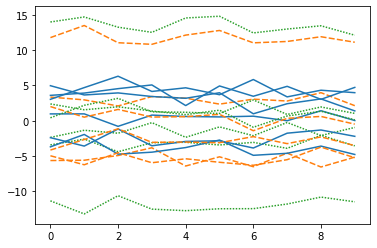

(60, 3)


In [38]:
#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

# num_samples = 61
num_samples = 3
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
    ax = sns.lineplot(ax=ax, data=df, legend=False)
    # ax = sns.lineplot(ax=ax, data=df, err_style="band")

plt.show()

print(timeSeries.shape)

In [2]:
def print_clusters(timeSeries, Z, k, plot=False, plot_threshold=5):
    results = fcluster(Z, k, criterion="maxclust")

    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indices = s[s==c].index
        cluster_size = len(cluster_indices)

        if plot and cluster_size > plot_threshold:
            cluster_series = timeSeries.T.iloc[:, cluster_indices]
            sns.tsplot(data=cluster_series.T.values, err_style="unit_traces")
            plt.show()